In [15]:
import pandas as pd
import geopandas as gpd
import os
import folium

In [10]:
from calculate_captured_areas import get_isochrones
from constants import WGS84

In [4]:
df = pd.read_csv("matches.csv")

In [7]:
df = df[df.state=="AR"]

In [9]:
df.shape

(16, 26)

In [11]:
# Note: should probably grab the isochrones in the plant matching process and save that dataset
lats_and_longs = list(map(tuple, df[["latitude", "longitude"]].to_numpy()))
dist = 60
MAPBOX_KEY = os.getenv("MAPBOX_API")
df["Isochrone"] = get_isochrones(lats_and_longs, dist, MAPBOX_KEY)
gdf = gpd.GeoDataFrame(df).set_geometry("Isochrone").set_crs(WGS84)

Mapbox Isochrones: 100%|██████████| 16/16 [00:01<00:00, 11.08it/s]


In [13]:
gdf.head(2)

,establishment_id,establishment_number,establishment_name,duns_number,street,city,state,zip,Matched_Company,Matched_Address,...,district,circuit,size,latitude,longitude,county,fips_code,geometry,buffered,Isochrone
4,3886,P7174,"Butterball, LLC",122262280.0,1294 N. College St.,Huntsville,AR,72740,SWIFT-ECKRICH INC ...,1294 N COLLEGE ST ...,...,35,3512,Large,36.101926,-93.737847,Madison County,5087.0,POINT (-5307886.4000427425 4985661.499774067),POLYGON ((-5306886.4000427425 4985661.49977406...,"POLYGON ((-93.78285 36.74414, -93.78461 36.739..."
6,3854,P511,"Butterball, LLC",122262280.0,307 Dodgen Place,Ozark,AR,72949,CONAGRA FOODS INC ...,307 DODGEN PL ...,...,35,3505,Large,35.485076,-93.818067,Franklin County,5047.0,POINT (-5373251.549510323 4962907.995597985),POLYGON ((-5372251.549510323 4962907.995597985...,"POLYGON ((-93.73707 36.16981, -93.73908 36.162..."


In [40]:
simplify = 0.01
gdf["Isochrone (Simplified)"] = gdf["Isochrone"].simplify(simplify)
gdf = gdf.set_geometry('Isochrone')

In [89]:
gdf.head(2)

,establishment_id,establishment_number,establishment_name,duns_number,street,city,state,zip,Matched_Company,Matched_Address,...,circuit,size,latitude,longitude,county,fips_code,geometry,buffered,Isochrone,Isochrone (Simplified)
4,3886,P7174,"Butterball, LLC",122262280.0,1294 N. College St.,Huntsville,AR,72740,SWIFT-ECKRICH INC ...,1294 N COLLEGE ST ...,...,3512,Large,36.101926,-93.737847,Madison County,5087.0,POINT (-5307886.4000427425 4985661.499774067),POLYGON ((-5306886.4000427425 4985661.49977406...,"POLYGON ((-93.78285 36.74414, -93.78461 36.739...","POLYGON ((-93.78285 36.74414, -93.83490 36.729..."
6,3854,P511,"Butterball, LLC",122262280.0,307 Dodgen Place,Ozark,AR,72949,CONAGRA FOODS INC ...,307 DODGEN PL ...,...,3505,Large,35.485076,-93.818067,Franklin County,5047.0,POINT (-5373251.549510323 4962907.995597985),POLYGON ((-5372251.549510323 4962907.995597985...,"POLYGON ((-93.73707 36.16981, -93.73908 36.162...","POLYGON ((-93.73707 36.16981, -93.75107 36.160..."


In [92]:
gdf.Matched_Company.unique()

array(['SWIFT-ECKRICH INC                                 ',
       'CONAGRA FOODS INC                                 ',
       'CARGILL MEAT SOLUTIONS CORP                       ',
       'GEORGES PROCESSING INC                            ',
       'PECO FOODS INC                                    ',
       'DARLING INGREDIENTS INC                           ',
       'PILGRIMS PRIDE CORPORATION                        ',
       'SIMMONS PREPARED FOODS INC                        ',
       'TYSON FOODS INC                                   ',
       'TYSON FRESH MEATS INC                             ',
       'WAYNE FARMS LLC                                   '], dtype=object)

In [97]:
corporate_areas = gdf.dissolve(by='Matched_Company').reset_index()[["Matched_Company", "Isochrone"]]

In [98]:
corporate_areas

,Matched_Company,Isochrone
0,CARGILL MEAT SOLUTIONS CORP ...,"POLYGON ((-94.18829 36.93359, -94.19039 36.933..."
1,CONAGRA FOODS INC ...,"POLYGON ((-93.73707 36.16981, -93.73908 36.162..."
2,DARLING INGREDIENTS INC ...,"POLYGON ((-90.81692 36.94055, -90.81985 36.939..."
3,GEORGES PROCESSING INC ...,"POLYGON ((-94.19065 36.93819, -94.19293 36.923..."
4,PECO FOODS INC ...,"POLYGON ((-91.55278 36.48437, -91.55442 36.480..."
5,PILGRIMS PRIDE CORPORATION ...,"POLYGON ((-94.20021 34.69238, -94.20059 34.688..."
6,SIMMONS PREPARED FOODS INC ...,"POLYGON ((-94.41984 37.06437, -94.42545 37.064..."
7,SWIFT-ECKRICH INC ...,"POLYGON ((-93.78285 36.74414, -93.78461 36.739..."
8,TYSON FOODS INC ...,"MULTIPOLYGON (((-92.91832 34.07537, -92.92244 ..."
9,TYSON FRESH MEATS INC ...,"POLYGON ((-93.03941 35.91166, -93.04241 35.907..."


In [102]:
intersections = gpd.sjoin(corporate_areas, corporate_areas, how='inner', predicate='intersects')

In [103]:
intersections.head(2)

,Matched_Company_left,Isochrone,index_right,Matched_Company_right
0,CARGILL MEAT SOLUTIONS CORP ...,"POLYGON ((-94.18829 36.93359, -94.19039 36.933...",8,TYSON FOODS INC ...
1,CONAGRA FOODS INC ...,"POLYGON ((-93.73707 36.16981, -93.73908 36.162...",8,TYSON FOODS INC ...


In [104]:
intersections.shape

(65, 4)

In [153]:
intersections_filtered = intersections[intersections.index != intersections['index_right']].copy().to_crs(WGS84)

In [154]:
intersections_filtered.shape

(54, 4)

In [155]:
intersections_filtered['intersection_geometry'] = intersections_filtered.apply(
    lambda row: corporate_areas.at[row.name, 'Isochrone'].intersection(corporate_areas.at[row['index_right'], 'Isochrone']),
    axis=1
)

In [124]:
intersections_filtered.head(2)

,Matched_Company_left,Isochrone,index_right,Matched_Company_right,intersection_geometry
0,CARGILL MEAT SOLUTIONS CORP ...,"POLYGON ((-94.18829 36.93359, -94.19039 36.933...",8,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ..."
1,CONAGRA FOODS INC ...,"POLYGON ((-93.73707 36.16981, -93.73908 36.162...",8,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.01865 35.80649, -94.01907 ..."


In [156]:
intersections_filtered.shape

(54, 5)

In [157]:
intersections_filtered  = intersections_filtered.set_geometry('intersection_geometry').set_crs(WGS84)
intersections_filtered = intersections_filtered[['Matched_Company_left', 'Matched_Company_right', 'intersection_geometry']]

In [160]:
intersections_filtered = intersections_filtered.reset_index()

In [128]:
multi_plant_access = intersections_filtered['intersection_geometry'].unary_union

In [113]:
corporate_areas['Captured Area'] = corporate_areas['Isochrone'].apply(lambda x: x.difference(multi_plant_access))

### Try to Figure Out the Two Corporation Access Here

In [161]:
corporate_access_join = gpd.sjoin(intersections_filtered, corporate_areas, how='left', predicate='intersects')

In [162]:
intersections_filtered.shape

(54, 4)

In [163]:
corporate_access_join.shape

(324, 7)

In [164]:
corporate_access_join

,index,Matched_Company_left,Matched_Company_right,intersection_geometry,index_right,Matched_Company,Captured Area
0,0,CARGILL MEAT SOLUTIONS CORP ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ...",8,TYSON FOODS INC ...,"MULTIPOLYGON (((-92.92244 34.07550, -92.92451 ..."
0,0,CARGILL MEAT SOLUTIONS CORP ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ...",9,TYSON FRESH MEATS INC ...,"MULTIPOLYGON (((-93.12964 35.87465, -93.12960 ..."
0,0,CARGILL MEAT SOLUTIONS CORP ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ...",1,CONAGRA FOODS INC ...,"MULTIPOLYGON (((-94.47288 35.68826, -94.47247 ..."
0,0,CARGILL MEAT SOLUTIONS CORP ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ...",7,SWIFT-ECKRICH INC ...,"MULTIPOLYGON (((-93.15192 35.84393, -93.15050 ..."
0,0,CARGILL MEAT SOLUTIONS CORP ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.26338 36.87890, -94.26196 ...",3,GEORGES PROCESSING INC ...,"MULTIPOLYGON (((-94.19065 36.93819, -94.18968 ..."
...,...,...,...,...,...,...,...
51,9,TYSON FRESH MEATS INC ...,PECO FOODS INC ...,"POLYGON ((-92.42684 35.43730, -92.42846 35.437...",4,PECO FOODS INC ...,"MULTIPOLYGON (((-91.58417 36.45914, -91.58488 ..."
52,4,PECO FOODS INC ...,DARLING INGREDIENTS INC ...,"MULTIPOLYGON (((-91.58629 36.46402, -91.58578 ...",4,PECO FOODS INC ...,"MULTIPOLYGON (((-91.58417 36.45914, -91.58488 ..."
52,4,PECO FOODS INC ...,DARLING INGREDIENTS INC ...,"MULTIPOLYGON (((-91.58629 36.46402, -91.58578 ...",2,DARLING INGREDIENTS INC ...,"MULTIPOLYGON (((-91.63141 36.47496, -91.63292 ..."
53,8,TYSON FOODS INC ...,PILGRIMS PRIDE CORPORATION ...,"MULTIPOLYGON (((-94.33544 33.32055, -94.33385 ...",8,TYSON FOODS INC ...,"MULTIPOLYGON (((-92.92244 34.07550, -92.92451 ..."


In [165]:
overlap_count = corporate_access_join.groupby(corporate_access_join.index).size()

In [166]:
overlap_count

0     7
1     8
2     7
3     2
4     6
5     8
6     7
7     5
8     6
9     7
10    6
11    2
12    7
13    7
14    5
15    7
16    7
17    6
18    8
19    8
20    7
21    5
22    7
23    8
24    7
25    6
26    8
27    7
28    5
29    7
30    7
31    6
32    7
33    7
34    6
35    7
36    7
37    6
38    7
39    7
40    6
41    6
42    6
43    6
44    6
45    6
46    5
47    5
48    5
49    5
50    2
51    2
52    2
53    2
dtype: int64

In [171]:
two_plant_access_indeces = overlap_count[overlap_count == 2]

In [172]:
two_plant_access_indeces

3     2
11    2
50    2
51    2
52    2
53    2
dtype: int64

In [175]:
two_plant_access_isochrones = intersections_filtered[intersections_filtered.index.isin(two_plant_access_indeces.index)]

In [176]:
two_plant_access_isochrones

,index,Matched_Company_left,Matched_Company_right,intersection_geometry
3,5,PILGRIMS PRIDE CORPORATION ...,TYSON FOODS INC ...,"MULTIPOLYGON (((-94.45521 34.67664, -94.45288 ..."
11,4,PECO FOODS INC ...,TYSON FRESH MEATS INC ...,"POLYGON ((-92.42846 35.43752, -92.42668 35.437..."
50,2,DARLING INGREDIENTS INC ...,PECO FOODS INC ...,"MULTIPOLYGON (((-91.63292 36.47315, -91.63183 ..."
51,9,TYSON FRESH MEATS INC ...,PECO FOODS INC ...,"POLYGON ((-92.42684 35.43730, -92.42846 35.437..."
52,4,PECO FOODS INC ...,DARLING INGREDIENTS INC ...,"MULTIPOLYGON (((-91.58629 36.46402, -91.58578 ..."
53,8,TYSON FOODS INC ...,PILGRIMS PRIDE CORPORATION ...,"MULTIPOLYGON (((-94.33544 33.32055, -94.33385 ..."


In [178]:
two_plant_access_area = two_plant_access_isochrones['intersection_geometry'].unary_union

In [179]:
three_plus_plant_access_area = multi_plant_access - two_plant_access_area

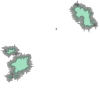

In [180]:
two_plant_access_area

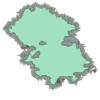

In [181]:
three_plus_plant_access_area

In [182]:
type(three_plus_plant_access_area)

shapely.geometry.multipolygon.MultiPolygon

In [65]:
gdf_intersections = gpd.GeoDataFrame(geometry=intersections_filtered['intersection_geometry'].unique()).set_crs(WGS84)

In [66]:
gdf_intersections.head(2)

,geometry
0,"MULTIPOLYGON (((-93.86685 35.42404, -93.86866 ..."
1,"MULTIPOLYGON (((-94.32168 35.19069, -94.32207 ..."


In [67]:
gdf_intersections.shape

(106, 1)

In [68]:
intersections_second_round = gpd.sjoin(gdf_intersections, gdf, how='inner', op='intersects')

/root/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [69]:
intersections_second_round.shape

(800, 29)

In [72]:
intersections_second_round.head(2)

,geometry_left,index_right,establishment_id,establishment_number,establishment_name,duns_number,street,city,state,zip,...,district,circuit,size,latitude,longitude,county,fips_code,geometry_right,buffered,Isochrone (Simplified)
0,"MULTIPOLYGON (((-93.86685 35.42404, -93.86866 ...",112,3858,P1009,Wayne Farms LLC,797613275.0,2301 East 8th Street,Danville,AR,72833,...,35,3514,Large,35.055289,-93.368979,Yell County,5149.0,POINT (-5399002.707148912 4905181.276412003),POLYGON ((-5398002.707148912 4905181.276412003...,"POLYGON ((-93.09898 35.67158, -93.09993 35.657..."
1,"MULTIPOLYGON (((-94.32168 35.19069, -94.32207 ...",112,3858,P1009,Wayne Farms LLC,797613275.0,2301 East 8th Street,Danville,AR,72833,...,35,3514,Large,35.055289,-93.368979,Yell County,5149.0,POINT (-5399002.707148912 4905181.276412003),POLYGON ((-5398002.707148912 4905181.276412003...,"POLYGON ((-93.09898 35.67158, -93.09993 35.657..."


In [75]:
intersections_second_round['count'] = intersections_second_round.groupby(intersections_second_round.index).size()

In [76]:
intersections_second_round.head(2)

,geometry_left,index_right,establishment_id,establishment_number,establishment_name,duns_number,street,city,state,zip,...,circuit,size,latitude,longitude,county,fips_code,geometry_right,buffered,Isochrone (Simplified),count
0,"MULTIPOLYGON (((-93.86685 35.42404, -93.86866 ...",112,3858,P1009,Wayne Farms LLC,797613275.0,2301 East 8th Street,Danville,AR,72833,...,3514,Large,35.055289,-93.368979,Yell County,5149.0,POINT (-5399002.707148912 4905181.276412003),POLYGON ((-5398002.707148912 4905181.276412003...,"POLYGON ((-93.09898 35.67158, -93.09993 35.657...",6
1,"MULTIPOLYGON (((-94.32168 35.19069, -94.32207 ...",112,3858,P1009,Wayne Farms LLC,797613275.0,2301 East 8th Street,Danville,AR,72833,...,3514,Large,35.055289,-93.368979,Yell County,5149.0,POINT (-5399002.707148912 4905181.276412003),POLYGON ((-5398002.707148912 4905181.276412003...,"POLYGON ((-93.09898 35.67158, -93.09993 35.657...",6


In [83]:
count_overlaps = intersections_second_round.groupby(intersections_second_round.index).size()
count_overlaps = count_overlaps[count_overlaps == 2]

In [84]:
count_overlaps.shape

(12,)

In [85]:
count_overlaps

9      2
13     2
38     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
dtype: int64

In [87]:
two_plant_access = intersections_second_round[intersections_second_round.index.isin(count_overlaps.index)].copy()

In [88]:
two_plant_access

,geometry_left,index_right,establishment_id,establishment_number,establishment_name,duns_number,street,city,state,zip,...,circuit,size,latitude,longitude,county,fips_code,geometry_right,buffered,Isochrone (Simplified),count
9,"POLYGON ((-92.42846 35.43752, -92.42668 35.437...",90,3846,P72,"Tyson Foods, Inc",NaN,1291 N Highway 7,Dardanelle,AR,72834,...,3520,Large,35.216701,-93.162412,Yell County,5149.0,POINT (-5374554.67920939 4895870.744891049),"POLYGON ((-5373554.67920939 4895870.744891049,...","POLYGON ((-93.03941 35.91166, -93.05539 35.898...",2
13,"MULTIPOLYGON (((-92.40942 34.92870, -92.40926 ...",90,3846,P72,"Tyson Foods, Inc",NaN,1291 N Highway 7,Dardanelle,AR,72834,...,3520,Large,35.216701,-93.162412,Yell County,5149.0,POINT (-5374554.67920939 4895870.744891049),"POLYGON ((-5373554.67920939 4895870.744891049,...","POLYGON ((-93.03941 35.91166, -93.05539 35.898...",2
98,"POLYGON ((-92.42684 35.43730, -92.42846 35.437...",90,3846,P72,"Tyson Foods, Inc",NaN,1291 N Highway 7,Dardanelle,AR,72834,...,3520,Large,35.216701,-93.162412,Yell County,5149.0,POINT (-5374554.67920939 4895870.744891049),"POLYGON ((-5373554.67920939 4895870.744891049,...","POLYGON ((-93.03941 35.91166, -93.05539 35.898...",2
104,"MULTIPOLYGON (((-92.44412 34.94019, -92.44070 ...",90,3846,P72,"Tyson Foods, Inc",NaN,1291 N Highway 7,Dardanelle,AR,72834,...,3520,Large,35.216701,-93.162412,Yell County,5149.0,POINT (-5374554.67920939 4895870.744891049),"POLYGON ((-5373554.67920939 4895870.744891049,...","POLYGON ((-93.03941 35.91166, -93.05539 35.898...",2
38,"MULTIPOLYGON (((-94.45521 34.67664, -94.45288 ...",101,3841,P768+V768,"Tyson Foods, Inc.",NaN,442 Plant Street,Waldron,AR,72958,...,3514,Large,34.904260,-94.101943,Scott County,5127.0,POINT (-5443038.065774841 4958935.155396386),POLYGON ((-5442038.065774841 4958935.155396386...,"POLYGON ((-93.79594 35.55779, -93.80794 35.539...",2
102,"MULTIPOLYGON (((-94.46464 34.67595, -94.45894 ...",101,3841,P768+V768,"Tyson Foods, Inc.",NaN,442 Plant Street,Waldron,AR,72958,...,3514,Large,34.904260,-94.101943,Scott County,5127.0,POINT (-5443038.065774841 4958935.155396386),POLYGON ((-5442038.065774841 4958935.155396386...,"POLYGON ((-93.79594 35.55779, -93.80794 35.539...",2
9,"POLYGON ((-92.42846 35.43752, -92.42668 35.437...",48,3852,P468,"Peco Foods, Inc.",NaN,625 South Allen,Batesville,AR,72501,...,3513,Large,35.764522,-91.648782,Independence County,5063.0,POINT (-5258740.177745017 4798793.5720752),"POLYGON ((-5257740.177745017 4798793.5720752, ...","POLYGON ((-91.55278 36.48437, -91.56668 36.463...",2
97,"MULTIPOLYGON (((-91.63292 36.47315, -91.63183 ...",48,3852,P468,"Peco Foods, Inc.",NaN,625 South Allen,Batesville,AR,72501,...,3513,Large,35.764522,-91.648782,Independence County,5063.0,POINT (-5258740.177745017 4798793.5720752),"POLYGON ((-5257740.177745017 4798793.5720752, ...","POLYGON ((-91.55278 36.48437, -91.56668 36.463...",2
98,"POLYGON ((-92.42684 35.43730, -92.42846 35.437...",48,3852,P468,"Peco Foods, Inc.",NaN,625 South Allen,Batesville,AR,72501,...,3513,Large,35.764522,-91.648782,Independence County,5063.0,POINT (-5258740.177745017 4798793.5720752),"POLYGON ((-5257740.177745017 4798793.5720752, ...","POLYGON ((-91.55278 36.48437, -91.56668 36.463...",2
99,"MULTIPOLYGON (((-91.58629 36.46402, -91.58578 ...",48,3852,P468,"Peco Foods, Inc.",NaN,625 South Allen,Batesville,AR,72501,...,3513,Large,35.764522,-91.648782,Independence County,5063.0,POINT (-5258740.177745017 4798793.5720752),"POLYGON ((-5257740.177745017 4798793.5720752, ...","POLYGON ((-91.55278 36.48437, -91.56668 36.463...",2


In [78]:
# Filter the intersection geometries based on the counts to find those with 3 or more overlaps
resulting_intersections = gdf_intersections.loc[count_overlaps.index]

In [ ]:
resulting_intersections = intersections_second_round[intersections_second_round['count'] >= 3]

In [189]:
avg_lat = gdf['latitude'].mean()
avg_lon = gdf['longitude'].mean()
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=7)

# Add points:
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['establishment_name']}: {row['city']}, {row['state']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add polygons (Isochrones):
for idx, row in corporate_areas.iterrows():
    folium.GeoJson(
        row['Captured Area'],
        name='geojson',
        style_function=lambda x: {'fillColor': 'red', 'color': 'red'}
    ).add_to(m)

folium.GeoJson(two_plant_access_area, name='two plants', style_function=lambda x: {'fillColor': 'yellow', 'color': 'yellow'}).add_to(m)
folium.GeoJson(three_plus_plant_access_area, name='three plants', style_function=lambda x: {'fillColor': 'green', 'color': 'green'}).add_to(m)

# Add Layer Control to toggle layers
folium.LayerControl().add_to(m)

In [190]:
m

In [ ]:

simplify = 0.01
gdf["Isochrone (Simplified)"] = gdf["Isochrone"].simplify(simplify)
single_plant_access = get_single_plant_access(
    gdf["Isochrone (Simplified)"].tolist()
)
get_two_and_three_plant_access(single_plant_access)